In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import sklearn
import math
%matplotlib inline
from datasets import load_dataset
import copy


In [6]:
data = pd.read_csv("C:\\Users\\ranas\\OneDrive\\python\\Machine Learning\\Salary_dataset.csv")
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892


In [7]:
x_train = df['YearsExperience']
y_train = df['Salary']

In [8]:
print(len(x_train))
print(len(y_train))

30
30


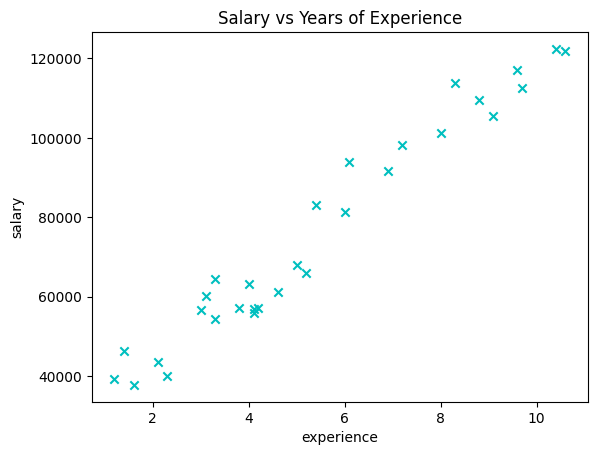

In [9]:
plt.scatter(x_train,y_train,marker = 'x',c = 'c')
plt.title("Salary vs Years of Experience")
plt.ylabel("salary")
plt.xlabel("experience")
plt.style.use("dark_background")
plt.show()


In [10]:
def compute_cost(x, y, w, b): 
    m = x.shape[0]
    total_cost = 0
    cost_sum = 0
    for i in range(m):
        f = w * x[i] + b
        cost =( f - y[i] ) ** 2
        cost_sum = cost_sum + cost
        
    total_cost = (1/(2*m)) * cost_sum
    return total_cost
    

In [11]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0 
    for i in range(m):
        f = w * x[i] + b
        dj_dw_i = (f - y[i]) * x[i]
        dj_db_i = f - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
       
    return dj_dw, dj_db

In [12]:
compute_gradient(x_train,y_train,2,3)

(-484913.9946666666, -75990.17333333334)

In [13]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
   
    m = len(x)
    
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    
    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

       
        if i<100000:      
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
    
    
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
        
    return w, b, J_history, w_history

Iteration    0: Cost 1297776513.31
Iteration  150: Cost 45381579.67
Iteration  300: Cost 31683112.96
Iteration  450: Cost 24292967.89
Iteration  600: Cost 20306080.49
Iteration  750: Cost 18155206.47
Iteration  900: Cost 16994837.83
Iteration 1050: Cost 16368834.01
Iteration 1200: Cost 16031113.07
Iteration 1350: Cost 15848917.00


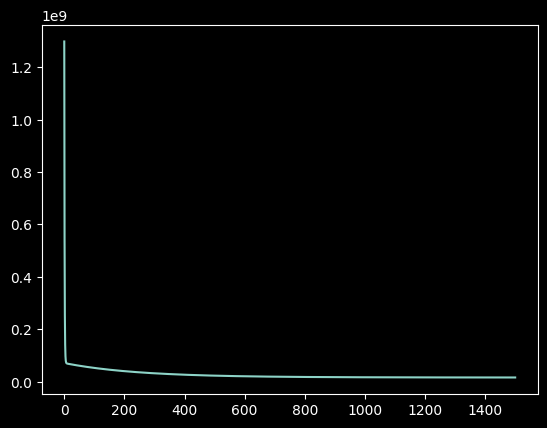

In [14]:
initial_w = 1
initial_b = 0
iterations = 1500
alpha = 0.01

w,b,J,_= gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)

iter = np.linspace(0,1500,1500)
plt.plot(iter,J)

In [15]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'years of experience')

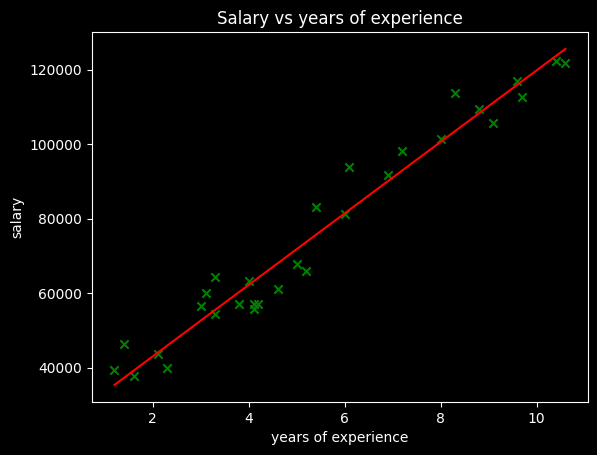

In [16]:
plt.plot(x_train, predicted, c = "r")
plt.scatter(x_train, y_train, marker='x', c='g') 

plt.title("Salary vs years of experience")
plt.ylabel('salary')
plt.xlabel('years of experience')

In [19]:
predict1 = 7 * w + b
print(predict1)

91026.66614401372
